# Classification

### We use classifcation models for questions with yes-no answers.
#### Metrics;
* accuracy
* precision
* recall
* f1-score
* confusion matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler

In [17]:
def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [18]:
df = pd.read_csv("hr_data.csv")

## EDA - Exploratory Data Analysis

In [19]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [20]:
df.sample(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1255,33,Travel_Rarely,211,Sales,16,3,Life Sciences,1,1758,1,Female,74,3,3,Sales Executive,1,2,8564.000000,10092,2,Y,Yes,20,4,3,80,0,11,2,2,0,0,0,0,Yes
1373,38,Travel_Frequently,1394,Research & Development,8,3,Medical,1,1937,4,Female,58,2,2,Research Scientist,2,3,2133.000000,18115,1,Y,Yes,16,3,3,80,1,20,3,3,20,11,0,7,No
1122,29,Travel_Rarely,1370,Research & Development,3,1,Medical,1,1586,2,Male,87,3,1,Laboratory Technician,1,2,4723.000000,16213,1,Y,Yes,18,3,4,80,0,10,3,3,10,9,1,5,No
1337,28,Travel_Rarely,1172,Sales,3,3,Medical,1,1875,2,Female,78,3,1,Sales Representative,2,1,2345.573629,3692,1,Y,No,19,3,4,80,1,1,3,3,1,0,0,0,NaN
1317,27,Travel_Frequently,1297,Research & Development,5,2,Life Sciences,1,1850,4,Female,53,3,1,Laboratory Technician,4,2,2716.254476,19826,0,Y,Yes,14,3,3,80,0,6,3,2,5,4,0,2,NaN


In [21]:
df.shape

(1470, 35)

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.000000,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.000000,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.000000,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.000000,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.000000,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.750000,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.000000,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.750000,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.000000,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.000000,5.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [24]:
df.isnull().sum()   

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [25]:
df['Attrition'].value_counts()

Attrition
No     1020
Yes     185
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

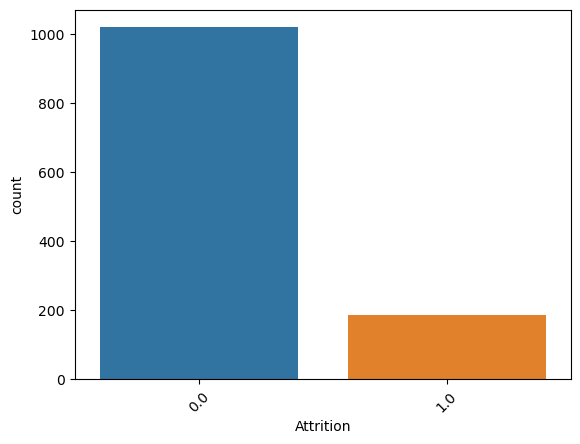

In [38]:
sns.countplot(x=df['Attrition'])
plt.xticks(rotation=45)

In [28]:
d = {'Yes': 1, 'No': 0}

In [29]:
df['Attrition'] = df['Attrition'].map(d)

In [30]:
df['Attrition'].value_counts()

Attrition
0.0    1020
1.0     185
Name: count, dtype: int64

In [32]:
empty = df[df['Attrition'].isnull()]
full = df[df['Attrition'].notnull()]

In [33]:
empty.shape, full.shape

((265, 35), (1205, 35))

In [61]:
x = full.drop('Attrition', axis=1)
y = full[['Attrition']]

In [62]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

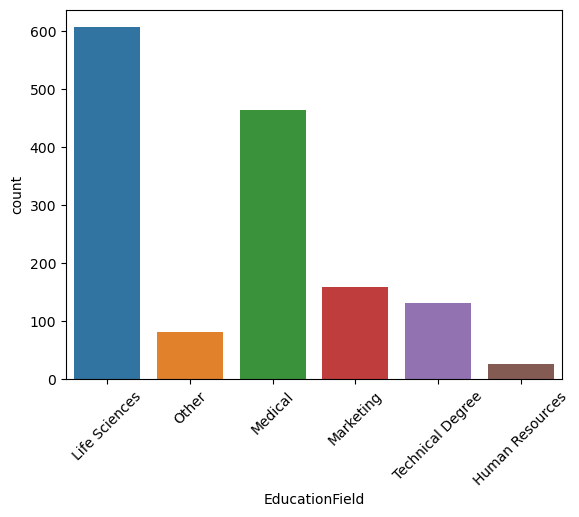

In [63]:
sns.countplot(x=df['EducationField'])
plt.xticks(rotation=45)

In [64]:
x = pd.get_dummies(x, drop_first=True)

In [65]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,2,5993.0,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,49,279,8,1,1,2,3,61,2,2,2,1,5130.0,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,37,1373,2,2,1,4,4,92,2,1,3,2,2090.0,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True
3,33,1392,3,4,1,5,4,56,3,1,3,1,2909.0,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,27,591,2,1,1,7,1,40,3,1,2,1,3468.0,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False


In [66]:
x.shape

(1205, 46)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [72]:
g = GaussianNB()
b = BernoulliNB()

In [92]:
g.fit(x_train, y_train)

GaussianNB()

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [94]:
g_pred = g.predict(x_test)

In [95]:
accuracy_score(g_pred , y_test)

0.7883817427385892

In [96]:
confusion_matrix(g_pred , y_test)   

array([[171,  11],
       [ 40,  19]])

<Axes: >

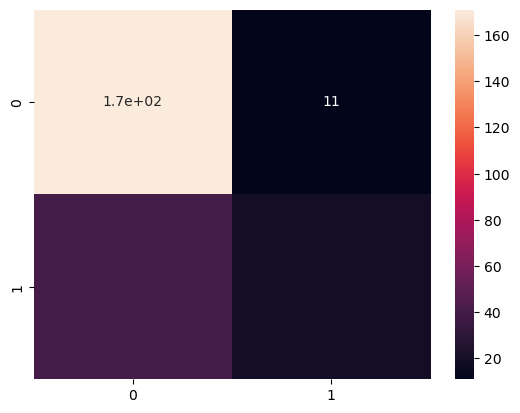

In [97]:
sns.heatmap(confusion_matrix(g_pred , y_test), annot=True)

In [98]:
print(classification_report(g_pred , y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87       182
         1.0       0.63      0.32      0.43        59

    accuracy                           0.79       241
   macro avg       0.72      0.63      0.65       241
weighted avg       0.77      0.79      0.76       241



In [99]:
b.fit(x_train, y_train)

BernoulliNB()

In [100]:
b_pred = b.predict(x_test)

In [101]:
accuracy_score(b_pred , y_test)

0.8257261410788381

<Axes: >

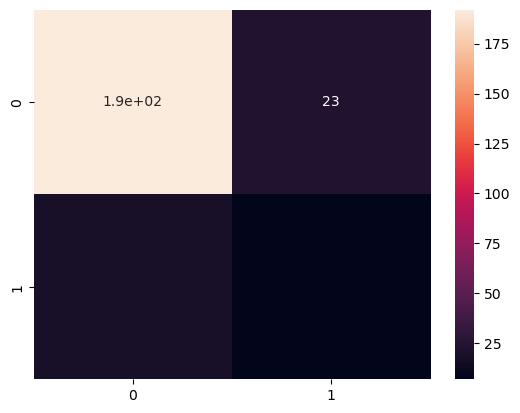

In [102]:
sns.heatmap(confusion_matrix(b_pred , y_test), annot=True)

In [103]:
print(classification_report(b_pred , y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       215
         1.0       0.23      0.27      0.25        26

    accuracy                           0.83       241
   macro avg       0.57      0.58      0.58       241
weighted avg       0.84      0.83      0.83       241



In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
l = LogisticRegression()

In [106]:
l.fit(x_train, y_train)

LogisticRegression()

In [107]:
l_pred = l.predict(x_test)

In [109]:
print(classification_report(l_pred , y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93       239
         1.0       0.00      0.00      0.00         2

    accuracy                           0.87       241
   macro avg       0.50      0.44      0.46       241
weighted avg       0.98      0.87      0.92       241



In [116]:
confusion_matrix(l_pred , y_test)   

array([[209,  30],
       [  2,   0]])

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
d = DecisionTreeClassifier()

In [113]:
d.fit(x_train, y_train)

DecisionTreeClassifier()

In [114]:
d_pred = d.predict(x_test)

In [115]:
print(classification_report(d_pred , y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88       199
         1.0       0.37      0.26      0.31        42

    accuracy                           0.79       241
   macro avg       0.61      0.58      0.59       241
weighted avg       0.77      0.79      0.78       241



In [117]:
confusion_matrix(d_pred , y_test)   

array([[180,  19],
       [ 31,  11]])

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
r = RandomForestClassifier()

In [120]:
r.fit(x_train, y_train)

RandomForestClassifier()

In [121]:
r_pred = r.predict(x_test)

In [122]:
print(classification_report(r_pred , y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94       238
         1.0       0.07      0.67      0.12         3

    accuracy                           0.88       241
   macro avg       0.53      0.77      0.53       241
weighted avg       0.98      0.88      0.93       241



In [124]:
confusion_matrix(r_pred , y_test)   

array([[210,  28],
       [  1,   2]])

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

In [126]:
h = GradientBoostingClassifier()

In [127]:
h.fit(x_train, y_train)

GradientBoostingClassifier()

In [128]:
h_pred = h.predict(x_test)

In [129]:
confusion_matrix(h_pred , y_test)   

array([[208,  24],
       [  3,   6]])

In [131]:
print(classification_report(h_pred , y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       232
         1.0       0.20      0.67      0.31         9

    accuracy                           0.89       241
   macro avg       0.59      0.78      0.62       241
weighted avg       0.96      0.89      0.92       241



In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [138]:
k = KNeighborsClassifier()

In [139]:
k.fit(x_train, y_train)

KNeighborsClassifier()

In [140]:
k_pred = k.predict(x_test)

In [141]:
confusion_matrix(k_pred , y_test)   

array([[205,  29],
       [  6,   1]])

In [142]:
print(classification_report(h_pred , y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       232
         1.0       0.20      0.67      0.31         9

    accuracy                           0.89       241
   macro avg       0.59      0.78      0.62       241
weighted avg       0.96      0.89      0.92       241

